In [1]:
%reset -f

In [2]:
#import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy.ma as ma


In [3]:
data=nc.Dataset('4903185_prof.nc')

In [11]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Argo float aggregated multi-cycle profile
    institution: US GDAC
    source: Argo float
    history: 2022-11-12T06:00:29Z
    references: http://www.argodatamgt.org/Documentation
    comment: free text
    user_manual_version: 3.2
    Conventions: Argo-3.2 CF-1.6
    featureType: trajectoryProfile
    dimensions(sizes): DATE_TIME(14), STRING256(256), STRING64(64), STRING32(32), STRING16(16), STRING8(8), STRING4(4), STRING2(2), N_PROF(148), N_PARAM(3), N_LEVELS(1050), N_CALIB(1), N_HISTORY(0)
    variables(dimensions): |S1 DATA_TYPE(STRING16), |S1 FORMAT_VERSION(STRING4), |S1 HANDBOOK_VERSION(STRING4), |S1 REFERENCE_DATE_TIME(DATE_TIME), |S1 DATE_CREATION(DATE_TIME), |S1 DATE_UPDATE(DATE_TIME), |S1 PLATFORM_NUMBER(N_PROF, STRING8), |S1 PROJECT_NAME(N_PROF, STRING64), |S1 PI_NAME(N_PROF, STRING64), |S1 STATION_PARAMETERS(N_PROF, N_PARAM, STRING16), int32 CYCLE_NUMBER(N_PROF), |S1

In [4]:
# EXPLORACION DE LAS VARIABLES; N_PROF=EL NUMERO DE PERFILES; N_LEVELS=DEPTH
pres=data['PRES_ADJUSTED'][0,:]
tem=data['TEMP_ADJUSTED'][0,:]
sal=data['PSAL_ADJUSTED'][0,:]

In [5]:
data['TEMP_ADJUSTED']

<class 'netCDF4._netCDF4.Variable'>
float32 TEMP_ADJUSTED(N_PROF, N_LEVELS)
    long_name: Sea temperature in-situ ITS-90 scale
    standard_name: sea_water_temperature
    _FillValue: 99999.0
    units: degree_Celsius
    valid_min: -2.5
    valid_max: 40.0
    C_format: %10.3f
    FORTRAN_format: F10.3
    resolution: 0.001
unlimited dimensions: 
current shape = (148, 1050)
filling on

Text(0, 0.5, 'Pressure (dbar)')

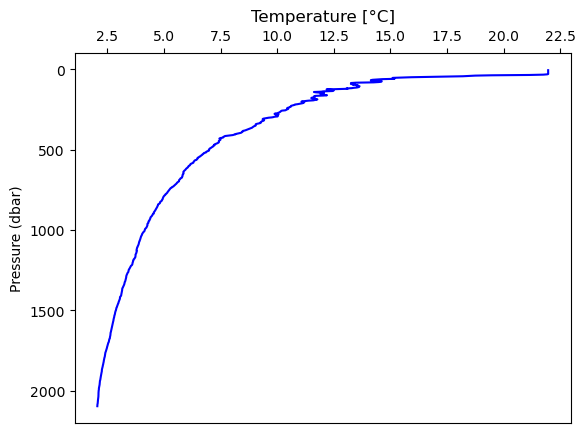

In [6]:
# figuras perfiles
# PERFIL DE TEMPERATURA

fig,ax=plt.subplots()
ax.plot(tem,pres,'-',color='b')
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_title('Temperature [°C]')
plt.ylabel('Pressure (dbar)')

In [7]:
pres=data['PRES_ADJUSTED'][:]
tem=data['TEMP_ADJUSTED'][:]
sal=data['PSAL_ADJUSTED'][:]

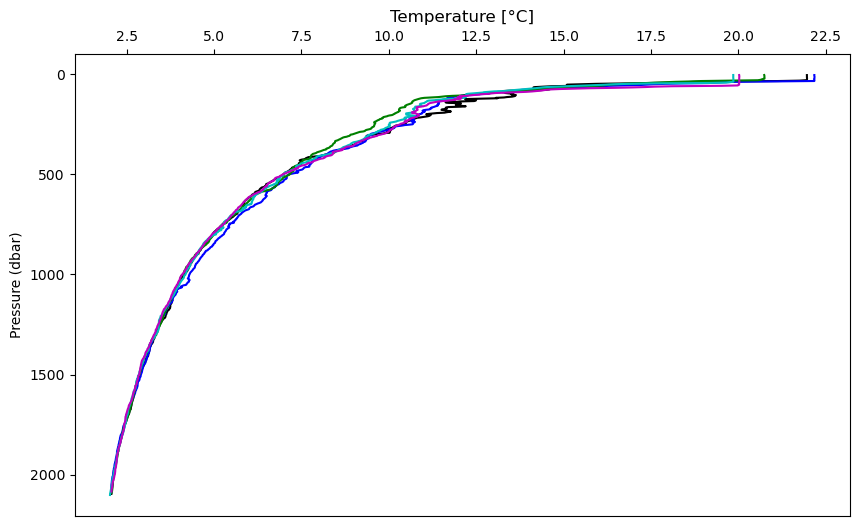

In [8]:
# PARA VARIOS PERFILES(5 PRIMEROS)

Color=['k','b','g','c','m']
fig,ax=plt.subplots(figsize=(10,6))
for i in range(0,5):
    ax.plot(tem[i,:],pres[i,:],'-',color=Color[i])
    #ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_title('Temperature [°C]')
    plt.ylabel('Pressure (dbar)')
    #plt.pause(.4)
    #plt.close()
ax.invert_yaxis()
    


In [24]:
import gsw
pres=data['PRES_ADJUSTED'][0,:]
tem=data['TEMP_ADJUSTED'][0,:]
sal=data['PSAL_ADJUSTED'][0,:]
lat=data['LATITUDE']
lon=data['LONGITUDE']
sa=gsw.conversions.SA_from_SP(sal,pres,lon[0],lat[0])
temp2=gsw.conversions.CT_from_t(sa,tem,pres)

In [23]:
help(gsw.conversions.CT_from_t)

Help on function CT_from_t in module gsw._wrapped_ufuncs:

CT_from_t(SA, t, p)
    Calculates Conservative Temperature of seawater from in-situ
    temperature.
    
    Parameters
    ----------
    SA : array-like
        Absolute Salinity, g/kg
    t : array-like
        In-situ temperature (ITS-90), degrees C
    p : array-like
        Sea pressure (absolute pressure minus 10.1325 dbar), dbar
    
    Returns
    -------
    CT : array-like, deg C
        Conservative Temperature (ITS-90)



In [10]:
help(gsw.conversions.SA_from_SP)

Help on function SA_from_SP in module gsw._wrapped_ufuncs:

SA_from_SP(SP, p, lon, lat)
    Calculates Absolute Salinity from Practical Salinity.  Since SP is
    non-negative by definition, this function changes any negative input
    values of SP to be zero.
    
    Parameters
    ----------
    SP : array-like
        Practical Salinity (PSS-78), unitless
    p : array-like
        Sea pressure (absolute pressure minus 10.1325 dbar), dbar
    lon : array-like
        Longitude, -360 to 360 degrees
    lat : array-like
        Latitude, -90 to 90 degrees
    
    Returns
    -------
    SA : array-like, g/kg
        Absolute Salinity



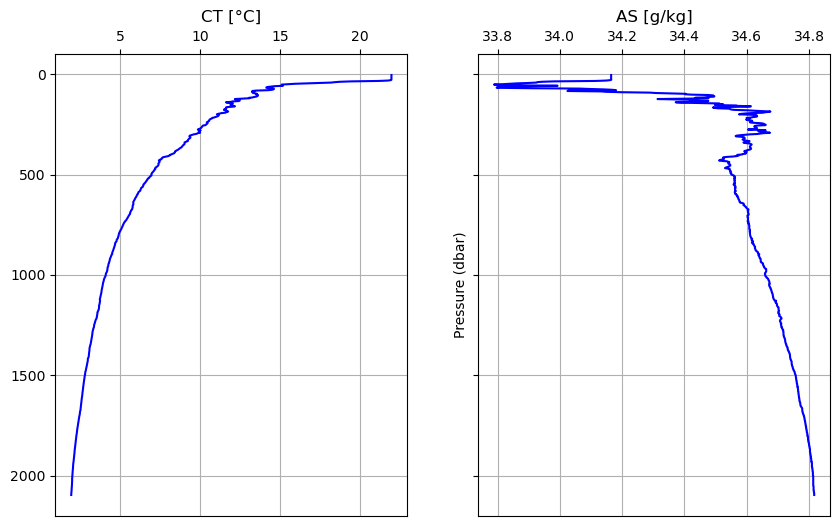

In [25]:
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10,6))
ax1.plot(temp2,pres,'-',color='b')
ax1.xaxis.tick_top()
ax1.set_title('CT [°C]')
plt.ylabel('Pressure (dbar)')


ax2.plot(sa,pres,'-',color='b')
ax2.xaxis.tick_top()
ax2.set_title('AS [g/kg]')
#plt.ylabel('Pressure (dbar)')
ax1.invert_yaxis()
ax1.grid()
ax2.grid()